In [38]:
import pandas as pd
from pandarallel import pandarallel
import ast
import matplotlib.pyplot as plt
import string
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
import re

In [2]:
dataRew=pd.read_json('../Dataset/IMDB_reviews.json',lines=True)
dataMovie=pd.read_json('../Dataset/IMDB_movie_details.json',lines=True)

In [4]:
dataRew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573913 entries, 0 to 573912
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   review_date     573913 non-null  object
 1   movie_id        573913 non-null  object
 2   user_id         573913 non-null  object
 3   is_spoiler      573913 non-null  bool  
 4   review_text     573913 non-null  object
 5   rating          573913 non-null  int64 
 6   review_summary  573913 non-null  object
dtypes: bool(1), int64(1), object(5)
memory usage: 26.8+ MB


In [5]:
dataMovie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       1572 non-null   object 
 1   plot_summary   1572 non-null   object 
 2   duration       1572 non-null   object 
 3   genre          1572 non-null   object 
 4   rating         1572 non-null   float64
 5   release_date   1572 non-null   object 
 6   plot_synopsis  1572 non-null   object 
dtypes: float64(1), object(6)
memory usage: 86.1+ KB


In [6]:
dataMovie.head()

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",6.7,2002-04-11,
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...


In [7]:
dataRew.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"


In [8]:
ColonnaL=dataRew["review_text"].apply(len)

1460 caratteri di media ogni recensione

In [9]:
ColonnaL.mean()

1460.5535246631457

In [10]:
dataRew.groupby(dataRew["is_spoiler"]).nunique()

,review_date,movie_id,user_id,review_text,rating,review_summary
is_spoiler,,,,,,
False,7104,1572,206382,422601,10,368983
True,6702,1570,79039,150862,10,139061


In [11]:
dataRew.isnull().sum()

review_date       0
movie_id          0
user_id           0
is_spoiler        0
review_text       0
rating            0
review_summary    0
dtype: int64

In [12]:
dataMovie.isnull().sum()

movie_id         0
plot_summary     0
duration         0
genre            0
rating           0
release_date     0
plot_synopsis    0
dtype: int64

In [13]:
unique_data=dataRew["review_date"].unique()

In [14]:
data = pd.to_datetime(unique_data)

In [15]:
unique_data

array(['10 February 2006', '6 September 2000', '3 August 2001', ...,
       '28 July 1998', '3 September 1998', '31 August 1998'], dtype=object)

In [16]:
data

DatetimeIndex(['2006-02-10', '2000-09-06', '2001-08-03', '2002-09-01',
               '2004-05-20', '2004-08-12', '2005-10-09', '2012-02-04',
               '2008-10-24', '2011-07-30',
               ...
               '2002-01-01', '2018-01-04', '2018-01-05', '2018-01-06',
               '2018-01-07', '1998-09-04', '1998-08-28', '1998-07-28',
               '1998-09-03', '1998-08-31'],
              dtype='datetime64[ns]', length=7104, freq=None)

In [17]:
data.min()

Timestamp('1998-07-28 00:00:00')

In [18]:
data.max()

Timestamp('2018-01-07 00:00:00')

### Distribution of spoilers

In [19]:
values=dataRew["is_spoiler"].value_counts()

Text(0.5, 1.0, 'Distribution of Spoiler in reviews')

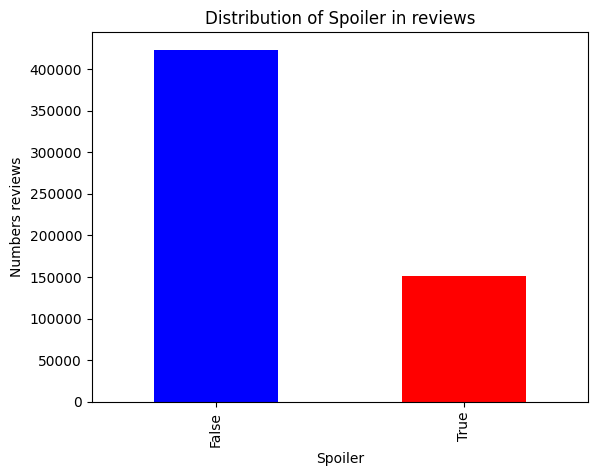

In [20]:
values.plot(kind='bar',color=['blue','red'])
plt.xlabel('Spoiler')
plt.ylabel('Numbers reviews')
plt.title('Distribution of Spoiler in reviews')

## Review Cleaning

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fraci\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


### Tokenization

In [5]:
def tokenize_text(text):
    from nltk.tokenize import WordPunctTokenizer
    tokenizer=WordPunctTokenizer()
    return tokenizer.tokenize(text)


In [6]:
dataRew['clean_review'] = dataRew.loc[:,"review_text"].parallel_apply(tokenize_text)

In [9]:
dataRew.to_csv('../Dataset/datiCleanTokenize.csv', index=False)

### Delete StopWords

In [23]:
def takeDataset(x):
    ## When i read the csv, the last column is not an array but a string
    dataRew=pd.read_csv(x)
    ## Converting the string in an array before delete stop words
    dataRew["clean_review"]=dataRew.loc[:,"clean_review"].parallel_apply(ast.literal_eval)

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fraci\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
def remove_Stop(x):
  from nltk.corpus import stopwords
  stop_words = set(stopwords.words('english'))
  filtered_sentence = [word for word in x if word.lower() not in stop_words]
  return filtered_sentence

In [12]:
dataRew['clean_review']=dataRew.loc[:,'clean_review'].parallel_apply(remove_Stop)

In [13]:
dataRew.to_csv('../Dataset/datiCleanTokenizeStop.csv', index=False)

### Remove Punctuation

In [14]:
def rimuovi_punteggiatura(testo):
     import string
     senzaP = [parola for parola in testo if parola not in string.punctuation]
     return senzaP

In [15]:
dataRew['clean_review']=dataRew.loc[:,'clean_review'].parallel_apply(rimuovi_punteggiatura)

In [16]:
dataRew.to_csv('../Dataset/datiCleanTokenizeStopNotPun.csv', index=False)

### Stemming

In [18]:
def stem_text(x):
  from nltk.stem import SnowballStemmer
  stemmer=SnowballStemmer('english')
  s_words=[stemmer.stem(word) for word in x]
  return s_words

In [20]:
dataRew['clean_review']=dataRew.loc[:,'clean_review'].parallel_apply(stem_text)

In [46]:
dataRew.loc[3,"clean_review"]

['**',
 'yes',
 'spoiler',
 '**',
 'film',
 'emot',
 'impact',
 'find',
 'hard',
 'write',
 'comment',
 'read',
 'lot',
 'previous',
 'comment',
 'gush',
 'eulogis',
 'well',
 'think',
 'rate',
 'clich',
 'got',
 'good',
 'point',
 'make',
 'howev',
 'thing',
 'think',
 'everyon',
 'struggl',
 'explain',
 'come',
 'term',
 'film',
 'love',
 'love',
 'extent',
 'mani',
 'almost',
 'spiritu',
 'experi',
 'secular',
 'natur',
 'like',
 'love',
 'one',
 'devast',
 'uplift',
 'thing',
 'happen',
 'watch',
 'film',
 'go',
 'review',
 'go',
 'struggl',
 'way',
 'explain',
 'film',
 'took',
 'view',
 'get',
 'connect',
 'deepli',
 'goe',
 'mani',
 'peopl',
 'world',
 'unhappi',
 'peopl',
 'world',
 'want',
 'unhappi',
 'lot',
 'peopl',
 'wish',
 'pray',
 'hope',
 'magic',
 'wand',
 'wave',
 'wash',
 'fear',
 'loss',
 'anger',
 'pain',
 'see',
 'lot',
 'peopl',
 'seem',
 'magic',
 'state',
 'suffer',
 'borrow',
 'word',
 'anoth',
 'film',
 'watch',
 'bluebird',
 'fli',
 'rainbow',
 'mani',
 'un

### Regex to final remove of punct.

In [48]:
def remove_punct2(words_list):
    import re
    pattern=re.compile(r'[^\w\s]')
    clean_words=[word for word in words_list if not pattern.search(word)]
    return clean_words

In [49]:
dataRew['clean_review']=dataRew.loc[:,'clean_review'].parallel_apply(remove_punct2)

In [52]:
dataRew.to_csv('../Dataset/datiClean.csv', index=False)

In [55]:
dataRew.loc

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary,clean_review
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.,"[oscar, year, shawshank, redempt, written, dir..."
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.,"[shawshank, redempt, without, doubt, one, bril..."
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film,"[believ, film, best, stori, ever, told, film, ..."
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?,"[yes, spoiler, film, emot, impact, find, hard,..."
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted","[heart, extraordinari, movi, brilliant, indel,..."


##  Clean Summary of Movie

### Tokenize

In [24]:
def tokenize_text(text):
   from nltk.tokenize import WordPunctTokenizer
   tokenizer=WordPunctTokenizer()
   return tokenizer.tokenize(text)

In [25]:
dataMovie["plot_clean"]=dataMovie.loc[:,"plot_synopsis"].parallel_apply(tokenize_text)

### Remove Stop Words

In [26]:
nltk.download('stopwords')
def remove_Stop(x):
   from nltk.corpus import stopwords
   stop_words=set(stopwords.words('english'))
   filtered_sentence=[word for word in x if word.lower() not in stop_words]
   return filtered_sentence

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fraci\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
dataMovie["plot_clean"]=dataMovie.loc[:,"plot_clean"].parallel_apply(remove_Stop)

In [28]:
dataMovie["plot_clean"]

0       [Jack, Ryan, (, Ford, ), ", working, vacation,...
1       [Four, boys, around, age, 10, friends, Brookly...
2                                                      []
3       [Fred, Dobbs, (, Humphrey, Bogart, ), Bob, Cur...
4       [Jim, McAllister, (, Matthew, Broderick, ), mu...
                              ...                        
1567    [year, 1998, ,, Evan, Treborn, (, Ashton, Kutc...
1568    [Brandon, (, Michael, Fassbender, ), successfu...
1569    [film, alternates, three, different, periods, ...
1570                                                   []
1571                                                   []
Name: plot_clean, Length: 1572, dtype: object

### Remove punctuation

In [29]:
def remove_punct(x):
   import string
   senzaP=[parola for parola in x if parola not in string.punctuation]
   return senzaP

In [30]:
dataMovie["plot_clean"]=dataMovie.loc[:,"plot_clean"].parallel_apply(remove_punct)

In [31]:
dataMovie["plot_clean"]

0       [Jack, Ryan, Ford, working, vacation, London, ...
1       [Four, boys, around, age, 10, friends, Brookly...
2                                                      []
3       [Fred, Dobbs, Humphrey, Bogart, Bob, Curtin, T...
4       [Jim, McAllister, Matthew, Broderick, much, ad...
                              ...                        
1567    [year, 1998, Evan, Treborn, Ashton, Kutcher, )...
1568    [Brandon, Michael, Fassbender, successful, han...
1569    [film, alternates, three, different, periods, ...
1570                                                   []
1571                                                   []
Name: plot_clean, Length: 1572, dtype: object

### Stemming

In [32]:
def Stem(x):
   from nltk.stem import PorterStemmer
   stemmer=PorterStemmer()
   words=[stemmer.stem(word) for word in x]
   return words

In [33]:
dataMovie["plot_clean"]=dataMovie.loc[:,"plot_clean"].parallel_apply(Stem)

### Remove Punctuaction 2

In [53]:
dataMovie['plot_clean']=dataMovie.loc[:,'plot_clean'].parallel_apply(remove_punct2)

In [54]:
dataMovie.to_csv("../Dataset/movieclean.csv")

In [57]:
dataMovie

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis,plot_clean
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in...","[jack, ryan, ford, work, vacat, london, famili..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...,"[four, boy, around, age, 10, friend, brooklyn,..."
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",6.7,2002-04-11,,[]
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...,"[fred, dobb, humphrey, bogart, bob, curtin, ti..."
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...,"[jim, mcallist, matthew, broderick, much, admi..."
...,...,...,...,...,...,...,...,...
1567,tt0289879,Evan Treborn grows up in a small town with his...,1h 53min,"[Sci-Fi, Thriller]",7.7,2004-01-23,"In the year 1998, Evan Treborn (Ashton Kutcher...","[year, 1998, evan, treborn, ashton, kutcher, s..."
1568,tt1723811,Brandon is a 30-something man living in New Yo...,1h 41min,[Drama],7.2,2012-01-13,"Brandon (Michael Fassbender) is a successful, ...","[brandon, michael, fassbend, success, handsom,..."
1569,tt5013056,Evacuation of Allied soldiers from the British...,1h 46min,"[Action, Drama, History]",8.1,2017-07-21,The film alternates between three different pe...,"[film, altern, three, differ, period, time, in..."
1570,tt0104014/,"For a while now, beautiful 24-year-old Diana B...",1h 33min,"[Comedy, Drama]",5.3,1992-02-21,,[]
